## FEATURES

*  ram_free (MB)
*  swap_free (MB)
*  disk_free (MB)
*  cpu_idle (%)
*  loadavg1 (0 - 3)
*  loadavg2 (0 - 3)
*  loadavg3 (0 - 3)


## LABELS (decision)

0 - Assign a job

1 - Skip

2 - Call master




In [1]:
import pandas as pd
import numpy as np

In [2]:
# Assign a job(Label: 0)

df1 = pd.DataFrame({
    'ram_free': [np.random.randint(2000, 4000) for i in range(5000)],
    'swap_free': [np.random.randint(1500, 2500) for i in range(5000)],
    'disk_free': [np.random.randint(5000, 50000) for i in range(5000)],
    'cpu_idle': [np.random.randint(50, 101) for i in range(5000)], 
    'loadavg1 ': [np.random.uniform(0, 0.5) for i in range(5000)], 
    'loadavg2 ': [np.random.uniform(0, 0.4) for i in range(5000)], 
    'loadavg3 ': [np.random.uniform(0, 0.3) for i in range(5000)],     
    'decision' : [0 for i in range(5000)]  
})
print(df1.shape)
df1.head()

(5000, 8)


,ram_free,swap_free,disk_free,cpu_idle,loadavg1,loadavg2,loadavg3,decision
0,2981,2113,32130,70,0.201275,0.030131,0.236213,0
1,2245,2046,40642,54,0.399852,0.052409,0.072863,0
2,3315,1986,40183,58,0.048366,0.229370,0.001315,0
3,2593,2195,11277,93,0.266367,0.349007,0.144782,0
4,3142,1657,39257,66,0.043236,0.145243,0.122970,0


In [3]:
# skip(Label: 1)

df2 = pd.DataFrame({
    'ram_free': [np.random.randint(200, 1000) for i in range(5000)],
    'swap_free': [np.random.randint(0, 1500) for i in range(5000)],
    'disk_free': [np.random.randint(500, 5000) for i in range(5000)],
    'cpu_idle': [np.random.randint(0, 50) for i in range(5000)], 
    'loadavg1 ': [np.random.uniform(0.75, 3) for i in range(5000)], 
    'loadavg2 ': [np.random.uniform(0.75, 3) for i in range(5000)], 
    'loadavg3 ': [np.random.uniform(0.75, 3) for i in range(5000)],     
    'decision' : [1 for i in range(5000)]  
})
print(df2.shape)
df2.head()

(5000, 8)


,ram_free,swap_free,disk_free,cpu_idle,loadavg1,loadavg2,loadavg3,decision
0,564,482,2386,39,1.553778,1.965973,0.768188,1
1,660,374,4897,25,0.898918,2.476587,2.456607,1
2,645,123,696,47,1.964223,1.026888,2.191406,1
3,943,315,2424,12,1.874123,2.503364,2.846073,1
4,636,722,4191,11,2.134972,1.829776,2.832951,1


In [4]:
# Call master (Label: 2)

df3 = pd.DataFrame({
    'ram_free': [np.random.randint(0, 200) for i in range(5000)],
    'swap_free': [np.random.randint(0, 100) for i in range(5000)],
    'disk_free': [np.random.randint(0, 500) for i in range(5000)],
    'cpu_idle': [np.random.randint(0, 5) for i in range(5000)], 
    'loadavg1 ': [np.random.uniform(3, 6) for i in range(5000)], 
    'loadavg2 ': [np.random.uniform(3, 6) for i in range(5000)], 
    'loadavg3 ': [np.random.uniform(3, 6) for i in range(5000)],     
    'decision' : [2 for i in range(5000)]  
})
print(df3.shape)
df3.head()

(5000, 8)


,ram_free,swap_free,disk_free,cpu_idle,loadavg1,loadavg2,loadavg3,decision
0,101,46,363,3,4.478365,4.382374,3.703795,2
1,175,10,481,3,4.233210,4.849858,4.620851,2
2,32,46,259,4,5.203785,3.191719,5.915067,2
3,159,95,496,3,3.947849,5.581153,4.579395,2
4,163,57,411,4,4.566778,4.072980,4.417879,2


In [5]:
# Final data

df = pd.concat([df1, df2, df3], axis=0)
print(df.shape)
df.head()

(15000, 8)


,ram_free,swap_free,disk_free,cpu_idle,loadavg1,loadavg2,loadavg3,decision
0,2981,2113,32130,70,0.201275,0.030131,0.236213,0
1,2245,2046,40642,54,0.399852,0.052409,0.072863,0
2,3315,1986,40183,58,0.048366,0.229370,0.001315,0
3,2593,2195,11277,93,0.266367,0.349007,0.144782,0
4,3142,1657,39257,66,0.043236,0.145243,0.122970,0


In [19]:
# Export pandas DataFrame as csv

df.to_csv('dataset.csv',index=False)

# Training with the data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [7]:
features = df.drop(["decision"], axis=1)
labels = df["decision"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.20, random_state=10)

In [12]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
predictions = logreg.predict(x_test)
predictions

array([2, 0, 2, ..., 0, 1, 0])

In [14]:
# Use score method to get accuracy of model (fraction of correct predictions : correct predictions / total number of data points)

score = logreg.score(x_test, y_test)
print(score)

0.9566666666666667


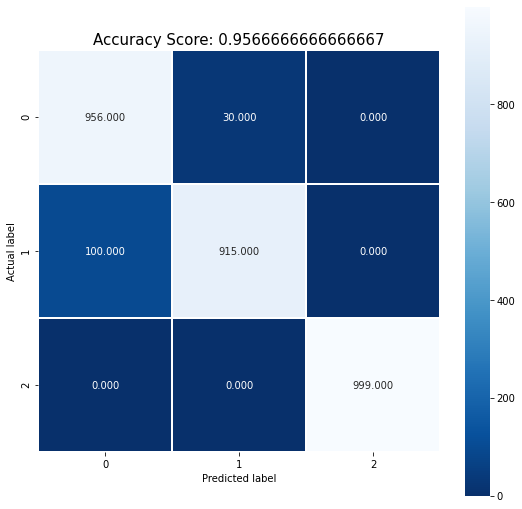

In [15]:
# confusion metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [18]:
# saving the model

import pickle
filename = 'networkmodel'
pickle.dump(logreg, open(filename, 'wb'))

In [22]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9566666666666667
